In [1]:
from PQC import *

In [5]:
def circ19():
    pqc = PQC("circ19",4)
    for i in range(4):
        pqc.add('rx',o=i)
    for i in range(4):
        pqc.add('rz',o=i)
    for i in range(3):
        pqc.add('crx',c=i,o=i+1)
    pqc.add('crx',c=3,o=0);
    return pqc

In [3]:
def test():
    pqc = PQC("test",2)
    pqc.add('rx',o=1)
    return pqc

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

4600 

4700 

4800 

4900 

5000 

5100 

5200 

5300 

5400 

5500 

5600 

5700 

5800 

5900 

6000 

6100 

6200 

6300 

6400 

6500 

6600 

6700 

6800 

6900 

7000 

7100 

7200 

7300 

7400 

7500 

7600 

7700 

7800 

7900 

8000 

8100 

8200 

8300 

8400 

8500 

8600 

8700 

8800 

8900 

9000 

9100 

9200 

9300 

9400 

9500 

9600 

9700 

9800 

9900 



0.05783931490078385

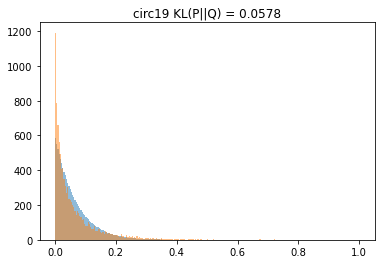

In [6]:
def expressibility(pqc, reps, param_num=12):
    arr = [];
    for i in range(reps):
        v1 = pqc.get(2*np.pi*np.random.uniform(size=(param_num,))).getH();
        v2 = pqc.get(2*np.pi*np.random.uniform(size=(param_num,)));
        fid = np.abs(v1*v2)**2;
        arr.append(fid[0,0]);
        if i%100==0 and i!=0:
            print(i,"\n");
    haar = [];
    h = Haar_dist(a=0,b=1,name="haar");
    for i in range(reps):
        haar.append(h.ppf((i+1)/reps,pqc.num));
    n_bins = 250;
    haar_pdf = plt.hist(np.array(haar), bins=n_bins, alpha=0.5,range=(0,1))[0]/reps; 
    pqc_pdf = plt.hist(np.array(arr), bins=n_bins, alpha=0.5, range=(0,1))[0]/reps;
    kl = kl_divergence(pqc_pdf,haar_pdf);
    plt.title("%s KL(P||Q) = %1.4f" % (pqc.name, kl))
    return kl;

pqc = circ19()
expressibility(pqc,10000,12)

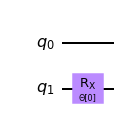

In [6]:
pqc.circ.draw('mpl')

# expressibility test

100 

200 

300 

400 



0.054299477362805465

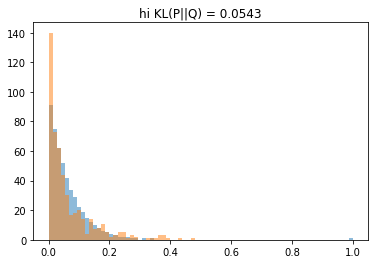

# entangling capability 계산

In [6]:
entangling_capability(pqc, 1000)

100 

200 

300 

400 

500 

600 

700 

800 

900 



0.4169896770904346